In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-on-movie-reviews/sampleSubmission.csv
/kaggle/input/sentiment-analysis-on-movie-reviews/test.tsv.zip
/kaggle/input/sentiment-analysis-on-movie-reviews/train.tsv.zip


In [2]:
train_data = pd.read_csv("/kaggle/input/sentiment-analysis-on-movie-reviews/train.tsv.zip", sep="\t")
test_data = pd.read_csv("/kaggle/input/sentiment-analysis-on-movie-reviews/test.tsv.zip", sep="\t")
all_data = pd.concat((train_data, test_data))

train_data.sample(20)


# The sentiment labels are:

# 0 - negative
# 1 - somewhat negative
# 2 - neutral
# 3 - somewhat positive
# 4 - positive

,PhraseId,SentenceId,Phrase,Sentiment
148246,148247,8068,"for Karen Black , who camps up a storm as a fr...",2
40360,40361,1931,callow pretension,1
96482,96483,5041,traps audiences,2
128469,128470,6911,utilized,2
72952,72953,3726,cinematography to the outstanding soundtrack a...,4
63543,63544,3217,the boss who ultimately expresses empathy for ...,2
40567,40568,1942,creating a screenplay,2
20537,20538,917,comes alive when poor Hermocrates and Leontine...,3
11131,11132,478,the addition of a biblical message will either...,2
26713,26714,1225,social and political,2


In [3]:
all_data.describe(include = "all")

,PhraseId,SentenceId,Phrase,Sentiment
count,222352.000000,222352.000000,222352,156060.000000
unique,NaN,NaN,212055,NaN
top,NaN,NaN,Home Alabama,NaN
freq,NaN,NaN,2,NaN
mean,111176.500000,5879.059550,NaN,2.063578
std,64187.637865,3506.664769,NaN,0.893832
min,1.000000,1.000000,NaN,0.000000
25%,55588.750000,2775.000000,NaN,2.000000
50%,111176.500000,5893.000000,NaN,2.000000
75%,166764.250000,8987.000000,NaN,3.000000


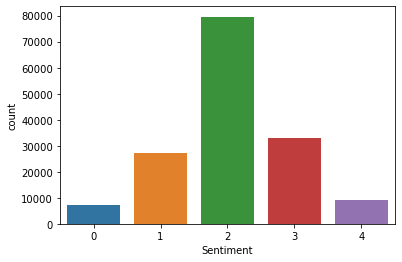

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
a = sns.countplot(train_data["Sentiment"])

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# from sklearn.linear_model import LogisticRegressionCV as logit
from sklearn.linear_model import LogisticRegression as logit

# pd.set_option('display.max_colwidth', -1)

train_X = train_data.iloc[:,2]
train_y = train_data.iloc[:,3]

max_feat = [10, 500, 1000, 5000, 10000, 20000]
scores = []
for iii in max_feat: 
    print(iii)
    vectorizer = CountVectorizer(max_features = iii)
    vertorized_X = vectorizer.fit_transform(train_X)
    print(vectorizer.get_feature_names())
    print(len(vectorizer.get_feature_names()))
    # print(vertorized_X.toarray())
    model = logit(max_iter = 500, random_state=0).fit(vertorized_X,train_y)
    score = model.score(vertorized_X,train_y)
    scores.append(score)
    print("logistic reg score {} for max feature {}".format(scores, max_feat))


10
['and', 'as', 'in', 'is', 'it', 'of', 'that', 'the', 'to', 'with']
10
logistic reg score [0.5154748173779315] for max feature [10, 500, 1000, 5000, 10000, 20000]
500
['about', 'above', 'act', 'acting', 'action', 'actor', 'actors', 'actually', 'adventure', 'after', 'again', 'against', 'age', 'all', 'almost', 'already', 'also', 'always', 'american', 'amusing', 'an', 'and', 'another', 'any', 'anyone', 'anything', 'are', 'around', 'art', 'as', 'at', 'audience', 'audiences', 'away', 'back', 'bad', 'be', 'beautiful', 'because', 'become', 'becomes', 'been', 'before', 'being', 'believe', 'best', 'better', 'between', 'beyond', 'big', 'bit', 'black', 'book', 'boring', 'both', 'boy', 'but', 'by', 'ca', 'camera', 'can', 'care', 'cast', 'character', 'characters', 'charm', 'charming', 'children', 'cinema', 'cinematic', 'class', 'classic', 'clever', 'cold', 'come', 'comedy', 'comes', 'comic', 'coming', 'compelling', 'complex', 'concept', 'could', 'crime', 'culture', 'dark', 'day', 'de', 'dead', 'd

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


logistic reg score [0.5154748173779315, 0.5704985262078688, 0.5989106753812636, 0.6719787261309753] for max feature [10, 500, 1000, 5000, 10000, 20000]
10000
['000', '10', '100', '101', '102', '103', '104', '105', '10th', '11', '110', '12', '13', '13th', '14', '146', '15', '16', '163', '170', '1790', '18', '19', '1915', '1920', '1938', '1940s', '1950s', '1952', '1958', '1959', '1960', '1960s', '1970s', '1971', '1973', '1975', '1979', '1980', '1984', '1987', '1989', '1993', '1995', '1999', '19th', '20', '2000', '2002', '20th', '21', '21st', '22', '24', '2455', '25', '26', '295', '30', '300', '3000', '30s', '3d', '40', '40s', '451', '48', '4ever', '50', '500', '50s', '51', '52', '60', '60s', '65', '65th', '70s', '72', '7th', '80', '800', '80s', '83', '84', '85', '86', '88', '89', '8th', '90', '90s', '91', '94', '95', '99', 'aaliyah', 'abagnale', 'abandon', 'abandoned', 'abbott', 'abc', 'abdul', 'abel', 'abhorrent', 'abhors', 'ability', 'abject', 'able', 'ably', 'abomination', 'aborted', 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


logistic reg score [0.5154748173779315, 0.5704985262078688, 0.5989106753812636, 0.6719787261309753, 0.7000320389593746] for max feature [10, 500, 1000, 5000, 10000, 20000]
20000
['000', '10', '100', '101', '102', '103', '104', '105', '10th', '11', '110', '112', '12', '120', '127', '129', '12th', '13', '13th', '14', '140', '146', '15', '15th', '16', '163', '168', '170', '1790', '18', '1899', '19', '1915', '1920', '1930s', '1933', '1937', '1938', '1940s', '1950', '1950s', '1952', '1953', '1957', '1958', '1959', '1960', '1960s', '1962', '1970', '1970s', '1971', '1972', '1973', '1975', '1979', '1980', '1980s', '1984', '1986', '1987', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1997', '1998', '1999', '19th', '20', '2000', '2001', '2002', '20th', '21', '21st', '22', '24', '2455', '25', '26', '270', '295', '30', '300', '3000', '30s', '37', '3d', '40', '40s', '42', '451', '48', '4ever', '4th', '4w', '50', '500', '50s', '51', '51st', '52', '53', '5ths', '60', '60s', '65', '65th', '

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [6]:
print("logistic reg score {} for max feature {}".format(scores, max_feat))

logistic reg score [0.5154748173779315, 0.5704985262078688, 0.5989106753812636, 0.6719787261309753, 0.7000320389593746, 0.7165256952454184] for max feature [10, 500, 1000, 5000, 10000, 20000]


In [7]:
# test_X = test_data.iloc[:,2]
# vertorized_test_X = vectorizer.transform(test_X)
# predict_y = model.predict(vertorized_test_X)

# submisssion result is 0.61619, ranking is 1xxx


Text(0.5, 0, 'max feature')

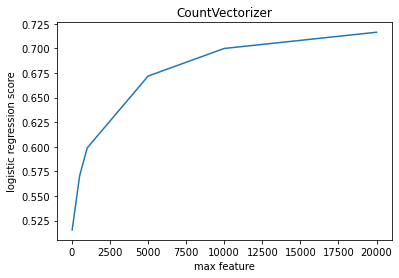

In [8]:
vector = pd.Series(scores, index = max_feat)
vector.plot(title = "CountVectorizer")
plt.ylabel("logistic regression score")
plt.xlabel("max feature")


Feature Generation using TF-IDF

In Term Frequency(TF), you just count the number of words occurred in each document. The main issue with this Term Frequency is that it will give more weight to longer documents. Term frequency is basically the output of the BoW model.

IDF(Inverse Document Frequency) measures the amount of information a given word provides across the document. IDF is the logarithmically scaled inverse ratio of the number of documents that contain the word and the total number of documents.



In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_scores = []
for iii in max_feat: 
    print(iii)
    tfidf = TfidfVectorizer(max_features = iii)
    tfidf_vectorised_X = tfidf.fit_transform(train_X)
    model = logit(max_iter = 500, random_state=0).fit(tfidf_vectorised_X,train_y)
    score = model.score(tfidf_vectorised_X,train_y)
    tfidf_scores.append(score)

print(tfidf.get_feature_names())
print(tfidf_vectorised_X.toarray())
print("logistic reg score {} for max feature {}".format(tfidf_scores, max_feat))

10
500
1000
5000
10000
20000
['000', '10', '100', '101', '102', '103', '104', '105', '10th', '11', '110', '112', '12', '120', '127', '129', '12th', '13', '13th', '14', '140', '146', '15', '15th', '16', '163', '168', '170', '1790', '18', '1899', '19', '1915', '1920', '1930s', '1933', '1937', '1938', '1940s', '1950', '1950s', '1952', '1953', '1957', '1958', '1959', '1960', '1960s', '1962', '1970', '1970s', '1971', '1972', '1973', '1975', '1979', '1980', '1980s', '1984', '1986', '1987', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1997', '1998', '1999', '19th', '20', '2000', '2001', '2002', '20th', '21', '21st', '22', '24', '2455', '25', '26', '270', '295', '30', '300', '3000', '30s', '37', '3d', '40', '40s', '42', '451', '48', '4ever', '4th', '4w', '50', '500', '50s', '51', '51st', '52', '53', '5ths', '60', '60s', '65', '65th', '66', '70', '70s', '71', '72', '75', '77', '78', '7th', '80', '800', '80s', '83', '84', '85', '86', '87', '88', '89', '8th', '90', '90s', '91', '93', 

**TFDIF performs worse than countvectorizer**

In [10]:
# Rerunning the countvectorizer but eliminating all punctuation and numbers

from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z]+')

max_feat = [10, 500, 1000, 5000, 10000]
scores = []
for iii in max_feat: 
    print(iii)
    vectorizer = CountVectorizer(max_features = iii,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
    vertorized_X = vectorizer.fit_transform(train_X)
    print(vectorizer.get_feature_names())
    # print(vertorized_X.toarray())
    model = logit(max_iter = 500, random_state=0).fit(vertorized_X,train_y)
    score = model.score(vertorized_X,train_y)
    scores.append(score)
    print("logistic reg score {} for max feature {}".format(scores, max_feat))



10
['film', 'good', 'like', 'lrb', 'movie', 'n', 'rrb', 's', 'story', 't']
logistic reg score [0.5138344226579521] for max feature [10, 500, 1000, 5000, 10000]
500
['act', 'acted', 'acting', 'action', 'actor', 'actors', 'actually', 'adults', 'adventure', 'age', 'air', 'ambitious', 'america', 'american', 'amusing', 'animation', 'approach', 'art', 'artist', 'attempt', 'attention', 'audience', 'audiences', 'away', 'b', 'bad', 'barely', 'beautiful', 'beautifully', 'beauty', 'believe', 'best', 'better', 'big', 'bit', 'black', 'bland', 'book', 'boring', 'boy', 'brilliant', 'bring', 'budget', 'ca', 'camera', 'care', 'career', 'case', 'cast', 'certainly', 'change', 'character', 'characters', 'charm', 'charming', 'cheap', 'children', 'cinema', 'cinematic', 'city', 'class', 'classic', 'clever', 'cliches', 'close', 'cold', 'come', 'comedies', 'comedy', 'comes', 'comic', 'coming', 'compelling', 'completely', 'complex', 'concept', 'contrived', 'convincing', 'cool', 'creative', 'creepy', 'crime', 'c

Vanillia countvectorizer is still the best estimator 

In [11]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(vertorized_X, train_y)
score = clf.score(vertorized_X,train_y)
print(score)

# result still not good as logistic regression 

0.65320389593746


In [12]:
# classifier = nltk.NaiveBayesClassifier.train(vertorized_X)
# print(nltk.classify.accuracy(classifier, test_set))

In [13]:
# from sklearn.model_selection import train_test_split
# X_train,X_val,y_train,y_val=train_test_split(train_sentences,target,test_size=0.2)

In [14]:
df_train_y = train_data[["Sentiment"]]
df_train_X = train_data.drop("Sentiment", axis = 1)
df_test_X = test_data

TOKENIZATION

In [15]:
from nltk.tokenize import word_tokenize

df_train_X["tokenized_phrase"] = df_train_X.apply(lambda row: word_tokenize(row['Phrase']), axis=1) # tokenize require a string
word_token = list(df_train_X['tokenized_phrase'].apply(pd.Series).stack()) #change to a list




from nltk.probability import FreqDist
fdist = FreqDist(word_token)
print(fdist)


<FreqDist with 18238 samples and 1124827 outcomes>


In [16]:
# unique_words = set()
# len_max = 0

# for sent in df_train_X['Phrase']:
    
#     unique_words.update(sent)
    
#     if(len_max<len(sent)):
#         len_max = len(sent)
        
# #length of the list of unique_words gives the no of unique words
# print(len(list(unique_words)))
# print(len_max)

In [17]:
fdist.most_common(20)

[('the', 46552),
 (',', 42006),
 ('a', 33443),
 ('of', 32245),
 ('and', 31695),
 ('to', 22363),
 ('.', 18079),
 ("'s", 16971),
 ('in', 13523),
 ('is', 13340),
 ('that', 12175),
 ('it', 10358),
 ('as', 8415),
 ('with', 7568),
 ('for', 7273),
 ('its', 6947),
 ('film', 6626),
 ('an', 5929),
 ('movie', 5827),
 ('this', 5064)]

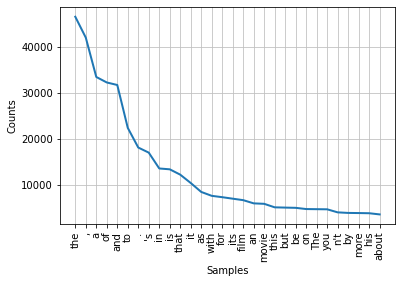

In [18]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

STOPWORDS

In [19]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'nor', 'over', 've', 'do', 'y', "isn't", 'ain', 'have', 'wouldn', 'any', 'or', 'own', 'above', 'all', "don't", 'those', 'shan', 'were', 'was', 'are', 'under', 'if', "she's", 'been', 'once', 'you', 'the', 'am', "won't", 'has', 'before', "you'd", 'shouldn', 'with', "should've", 'very', 'into', 'why', "weren't", 'theirs', 'just', 'so', 'm', 's', 'your', "needn't", 'aren', 'at', 'that', 'be', 'against', 'further', 'such', 'no', 'while', "didn't", 'can', 'won', 'she', 'where', 'i', 'off', 'don', 'herself', 'there', 'out', 'couldn', 'myself', 'his', 'weren', 'haven', "hadn't", "mightn't", 'which', 'to', 'll', 'who', "you've", 'ourselves', "aren't", 'him', 'o', 'below', 'after', 'as', "couldn't", 'yourselves', 'not', 'during', 'on', "that'll", 'but', 'both', 'isn', 'being', 'needn', 'its', 'a', 'whom', 'until', 'of', 'each', 'now', 'her', 'themselves', 'an', 'they', 'ours', 'them', 'again', 'should', 'only', "shan't", 'by', 'too', 'me', 'our', 'how', 'ma', 'hadn', 'these', 'between', 'throug

LEXICON NORMALIZATION

Lexicon normalization considers another type of noise in the text. For example, connection, connected, connecting word reduce to a common word "connect". It reduces derivationally related forms of a word to a common root word

Stemming.


Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. For example, connection, connected, connecting word reduce to a common word "connect".

Lemmatization

Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

In [20]:
# from nltk.stem.wordnet import WordNetLemmatizer
# lem = WordNetLemmatizer()

# from nltk.stem.porter import PorterStemmer
# stem = PorterStemmer()

POS Tagging

The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

nltk.pos_tag(tokens)

In [21]:
POS = nltk.pos_tag(word_token[1:3])
POS

[('series', 'NN'), ('of', 'IN')]

In [22]:
import unicodedata, re, string

# from bs4 import BeautifulSoup

# def proc_text(messy): #input is a single string
#     first = BeautifulSoup(messy, "lxml").get_text() #gets text without tags or markup, remove html

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_numbers(words):
    """Remove all interger occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        new_word = re.sub("\d+", "", word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
#     words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
#     words = remove_numbers(words)
#    words = remove_stopwords(words)
    return words

In [23]:
# First step - tokenizing phrases
df_train_X['Words'] = df_train_X['Phrase'].apply(nltk.word_tokenize)

# Second step - passing through prep functions
df_train_X['Words'] = df_train_X['Words'].apply(normalize) 
df_train_X['Words'].head()

0    [a, series, of, escapades, demonstrating, the,...
1    [a, series, of, escapades, demonstrating, the,...
2                                          [a, series]
3                                                  [a]
4                                             [series]
Name: Words, dtype: object

In [24]:
word_set = set()
for l in df_train_X['Words']:
    for e in l:
        word_set.add(e)
        
word_to_int = {word: ii for ii, word in enumerate(word_set, 1)}

# Check if they are still the same lenght
print(len(word_set))
print(len(word_to_int))

16400
16400


In [25]:
# revised logic only diff is wordset is dictionary adn word_set is string

wordset = set()
for i in df_train_X['Words']:
    wordset.update(i)
    
word_to_intt = {word: ii for ii, word in enumerate(wordset, 1)}    

print(len(wordset))

16400


In [26]:
df_train_X["token_word"] = df_train_X['Words'].apply(lambda l : [word_to_int[word] for word in l])
df_train_X.sample(10)

,PhraseId,SentenceId,Phrase,tokenized_phrase,Words,token_word
143757,143758,7802,Rich in atmosphere of the post-war art world,"[Rich, in, atmosphere, of, the, post-war, art,...","[rich, in, atmosphere, of, the, postwar, art, ...","[11768, 14581, 13651, 6732, 717, 11356, 13303,..."
354,355,13,performances,[performances],[performances],[852]
72544,72545,3707,has a true talent for drawing wrenching perfor...,"[has, a, true, talent, for, drawing, wrenching...","[has, a, true, talent, for, drawing, wrenching...","[1756, 3364, 16164, 11397, 1693, 2528, 3997, 8..."
31837,31838,1492,That ` Alabama ' manages to be pleasant in spi...,"[That, `, Alabama, ', manages, to, be, pleasan...","[that, alabama, manages, to, be, pleasant, in,...","[3780, 15705, 1254, 14417, 12837, 4729, 14581,..."
134511,134512,7257,Roman Polanski 's autobiographical gesture at ...,"[Roman, Polanski, 's, autobiographical, gestur...","[roman, polanski, s, autobiographical, gesture...","[2292, 13324, 11487, 8584, 12692, 5072, 5501, ..."
126574,126575,6805,Martha Stewart decorating program run amok,"[Martha, Stewart, decorating, program, run, amok]","[martha, stewart, decorating, program, run, amok]","[13154, 10681, 7549, 2855, 664, 5377]"
4956,4957,193,intended,[intended],[intended],[11132]
47896,47897,2335,American teen comedies,"[American, teen, comedies]","[american, teen, comedies]","[14431, 3823, 14419]"
141986,141987,7701,I did n't hate this one,"[I, did, n't, hate, this, one]","[i, did, nt, hate, this, one]","[15939, 12490, 14326, 6928, 678, 2692]"
67621,67622,3433,"... very funny , very enjoyable ...","[..., very, funny, ,, very, enjoyable, ...]","[very, funny, very, enjoyable]","[1771, 2910, 1771, 5512]"


In [27]:
max_len = df_train_X['token_word'].str.len().max()
print(max_len)

48


In [28]:
all_tokens = np.array([t for t in df_train_X['token_word']])
print(all_tokens.shape)
label = df_train_y["Sentiment"].values

# Create blank rows
features = np.zeros((len(all_tokens), max_len), dtype=int)
# for each phrase, add zeros at the end 
for i, row in enumerate(all_tokens):
    features[i, :len(row)] = row

#print first 3 values of the feature matrix 
print(features[:3])

(156060,)
[[ 3364  8282  6732  8972  6597   717  4154  3780 13301  1676  4224  1693
    717  6332  1676 14987  4224  1693   717 10145  4995  6732  8220 15225
   1339  3090  9708  6732  8220 16166 14417 14043  6732  3364  5570     0
      0     0     0     0     0     0     0     0     0     0     0     0]
 [ 3364  8282  6732  8972  6597   717  4154  3780 13301  1676  4224  1693
    717  6332     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]
 [ 3364  8282     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]]


In [29]:
model = logit(max_iter = 5000, random_state=0).fit(features,label)
score = model.score(features,label)

print("logistic reg score {}".format(score))

logistic reg score 0.5123862616942202


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


* Plain Vanilla Count Vectorizer accuracy reach 77%. Tokenization + Small letter + Drop punctuation drop to 51%

****TreebankWordTokenizer****

from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

tokenizer.tokenize('Hello World.')

['Hello', 'World', '.']

In [30]:
# **** word_tokenize can only apply for a string, we have to use apply function

from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
df_train_X['tree_tokenized'] = df_train_X.apply(lambda row: tokenizer.tokenize(row['Phrase']), axis=1)

In [31]:
wordset = set()
for i in df_train_X['tree_tokenized']:
    wordset.update(i)
    
word_to_intt = {word: ii for ii, word in enumerate(wordset, 1)}    

print(len(wordset))

18259


In [32]:
df_train_X["tree_token_word"] = df_train_X['tree_tokenized'].apply(lambda l : [word_to_intt[word] for word in l])
df_train_X.sample(10)

,PhraseId,SentenceId,Phrase,tokenized_phrase,Words,token_word,tree_tokenized,tree_token_word
41093,41094,1970,"makes for a touching love story ,","[makes, for, a, touching, love, story, ,]","[makes, for, a, touching, love, story]","[1561, 1693, 3364, 8203, 76, 5570]","[makes, for, a, touching, love, story, ,]","[1785, 1918, 3820, 9158, 93, 6282, 2398]"
17894,17895,779,a comedian,"[a, comedian]","[a, comedian]","[3364, 6052]","[a, comedian]","[3820, 6822]"
136427,136428,7376,little too obvious,"[little, too, obvious]","[little, too, obvious]","[13224, 2886, 9734]","[little, too, obvious]","[14703, 3282, 10828]"
44963,44964,2181,"Coppola , along with his sister , Sofia","[Coppola, ,, along, with, his, sister, ,, Sofia]","[coppola, along, with, his, sister, sofia]","[9193, 6762, 9704, 3061, 16019, 8613]","[Coppola, ,, along, with, his, sister, ,, Sofia]","[4467, 2398, 7587, 10797, 3484, 17878, 2398, 1..."
95045,95046,4957,in the Lone Star State,"[in, the, Lone, Star, State]","[in, the, lone, star, state]","[14581, 717, 1594, 9951, 6787]","[in, the, Lone, Star, State]","[16252, 867, 12372, 4964, 15328]"
52402,52403,2591,a TelePrompTer,"[a, TelePrompTer]","[a, teleprompter]","[3364, 652]","[a, TelePrompTer]","[3820, 17726]"
18802,18803,826,remarkably alluring,"[remarkably, alluring]","[remarkably, alluring]","[3507, 1810]","[remarkably, alluring]","[3970, 2055]"
111195,111196,5894,the vehicle,"[the, vehicle]","[the, vehicle]","[717, 7564]","[the, vehicle]","[867, 8445]"
110533,110534,5858,"The case is a convincing one , and should give...","[The, case, is, a, convincing, one, ,, and, sh...","[the, case, is, a, convincing, one, and, shoul...","[717, 6489, 1676, 3364, 11542, 2692, 11391, 78...","[The, case, is, a, convincing, one, ,, and, sh...","[4378, 7293, 1902, 3820, 12860, 3052, 2398, 12..."
119783,119784,6406,motherhood and,"[motherhood, and]","[motherhood, and]","[4586, 11391]","[motherhood, and]","[5131, 12688]"


In [33]:
# get the len of longest phrase
max_len = df_train_X['tree_token_word'].str.len().max()
print(max_len)

53


In [34]:
all_tokens = np.array([t for t in df_train_X['tree_token_word']])
all_tokens

array([list([12886, 9247, 7543, 9967, 7400, 867, 4657, 4264, 14789, 1902, 4722, 1918, 867, 7126, 1902, 16701, 4722, 1918, 867, 11305, 2398, 5613, 7543, 9177, 16965, 1537, 3517, 10802, 7543, 9177, 18029, 16082, 15643, 7543, 3820, 6282, 16768]),
       list([12886, 9247, 7543, 9967, 7400, 867, 4657, 4264, 14789, 1902, 4722, 1918, 867, 7126]),
       list([12886, 9247]), ..., list([16591, 11836]), list([16591]),
       list([11836])], dtype=object)

In [35]:
# Create blank rows
features = np.zeros((len(all_tokens), max_len), dtype=int)
# for each phrase, add zeros at the end 
for i, row in enumerate(all_tokens):
    features[i, :len(row)] = row

#print first 3 values of the feature matrix 
print(features[:3])


[[12886  9247  7543  9967  7400   867  4657  4264 14789  1902  4722  1918
    867  7126  1902 16701  4722  1918   867 11305  2398  5613  7543  9177
  16965  1537  3517 10802  7543  9177 18029 16082 15643  7543  3820  6282
  16768     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [12886  9247  7543  9967  7400   867  4657  4264 14789  1902  4722  1918
    867  7126     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [12886  9247     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]]


In [36]:
model = logit(max_iter = 5000, random_state=0).fit(features,label)
score = model.score(features,label)

print("logistic reg score for Tree tokenizer {}".format(score))

logistic reg score for Tree tokenizer 0.5119697552223503


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Builidng a Neural Network Model by Keras

In [37]:
# Import Tokenizer and pad_sequences
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")

In [39]:
# tokenizer.fit_on_texts(sentences)
# word_index = tokenizer.word_index
# print(word_index)

# sequences = tokenizer.texts_to_sequences(sentences)
# padded = pad_sequences(sequences)
# padded = pad_sequences(sequences, maxlen=15, padding="post") #padding default is "PRE"
# print (sequences)

In [40]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='pre'
oov_tok = "<OOV>"

X_tr, X_te, y_tr, y_te = train_test_split(df_train_X["Phrase"], df_train_y["Sentiment"], test_size=0.2, random_state=42)

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_tr)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X_tr)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_te)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [41]:
# Build a basic sentiment network
# Note the embedding layer is first, 
# and the output is only 1 node as it is either 0 or 1 (negative or positive)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Flatten(),
    tf.keras.layers.GlobalAveragePooling1D(), 
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                170       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
Total params: 16,225
Trainable params: 16,225
Non-trainable params: 0
_________________________________________________________________


In [42]:
print(X_tr.shape)
print(X_te.shape)
print(y_tr.shape)
print(y_te.shape)

(124848,)
(31212,)
(124848,)
(31212,)


In [43]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])  #reversing the index and value in dictionary

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text]) #get the corresponding word from the word index 

print(decode_review(padded[1]))

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? <OOV> rrb


In [44]:
# result 
accuracy = 61%, 58% ; vocab_size = 1000,max_length = 100, truncated type = 'post' padding_type='post'
accuracy = 64%, 60% ; vocab_size = 1000,max_length = 100, truncated type = 'pre' padding_type='pre'
accuracy = 64%, 61% ; vocab_size = 1000,max_length = 100, truncated type = 'post' padding_type='pre'
accuracy = 63%, 60% ; vocab_size = 1000,max_length = 1000, truncated type = 'post' padding_type='pre'
accuracy = 60%, 57% ; vocab_size = 5000,max_length = 100, truncated type = 'post' padding_type='pre'

# change to 10 neurons in the dense layer tf.keras.layers.Dense(10, activation='relu'),
accuracy = 65%, 61% ; vocab_size = 1000,max_length = 100, truncated type = 'post' padding_type='pre'

SyntaxError: invalid syntax (<ipython-input-44-c962874024e2>, line 2)

In [45]:
num_epochs = 50
model.fit(padded, y_tr, epochs=num_epochs, validation_data=(testing_padded, y_te))

Train on 124848 samples, validate on 31212 samples
Epoch 1/50
124848/124848 [==============================] - 13s 106us/sample - loss: 1.2509 - accuracy: 0.5052 - val_loss: 1.2279 - val_accuracy: 0.5096
Epoch 2/50
124848/124848 [==============================] - 12s 96us/sample - loss: 1.1926 - accuracy: 0.5241 - val_loss: 1.1843 - val_accuracy: 0.5215
Epoch 3/50
124848/124848 [==============================] - 13s 106us/sample - loss: 1.1516 - accuracy: 0.5394 - val_loss: 1.1425 - val_accuracy: 0.5429
Epoch 4/50
124848/124848 [==============================] - 13s 101us/sample - loss: 1.0999 - accuracy: 0.5619 - val_loss: 1.0832 - val_accuracy: 0.5664
Epoch 5/50
124848/124848 [==============================] - 12s 98us/sample - loss: 1.0521 - accuracy: 0.5817 - val_loss: 1.0630 - val_accuracy: 0.5798
Epoch 6/50
124848/124848 [==============================] - 12s 95us/sample - loss: 1.0313 - accuracy: 0.5919 - val_loss: 1.0456 - val_accuracy: 0.5844
Epoch 7/50
124848/124848 [========

In [46]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [47]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [48]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [49]:

testing_sequences = tokenizer.texts_to_sequences(df_test_X["Phrase"])
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)
# # Create the sequences
# padding_type='post'
# sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
# fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

classes = model.predict(testing_padded)


In [50]:
predicty = np.argmax(classes, axis = 1)

In [51]:
len(predicty)

66292

In [52]:
test_data.shape

(66292, 3)

In [53]:
data_to_submit

NameError: name 'data_to_submit' is not defined

In [54]:
data_to_submit = pd.DataFrame({"PhraseId":test_data["PhraseId"],"Sentiment":predicty})

In [55]:
data_to_submit.to_csv('csv_to_submit.csv', index = False)

> Reference / Source:


https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
https://www.datacamp.com/community/tutorials/simplifying-sentiment-analysis-python